# 小波变换
图像增强

In [7]:
from scipy.interpolate import interp2d,RegularGridInterpolator
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [2]:
# 这里使用随机数据作为示例，实际应用中应替换为从ArcGIS Pro数据库导出的栅格数据
data = np.random.rand(128, 128)  # 示例数据，实际数据应为您的栅格数据


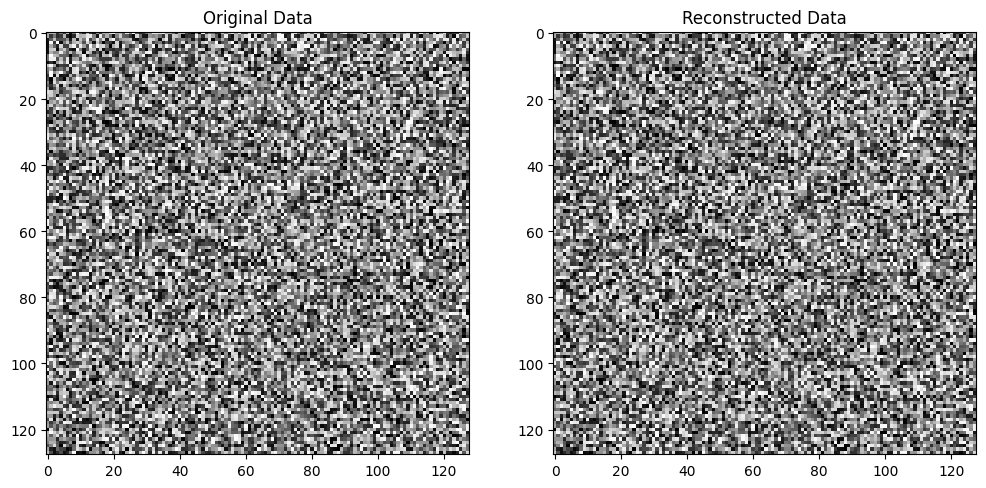

In [3]:
def wavelet_transform_reconstruction(data, wavelet='haar', level=1):
    """
    对二维数据进行小波变换和重构
    :param data: 输入的二维数组
    :param wavelet: 使用的小波类型
    :param level: 小波分解的级别
    :return: 小波重构后的二维数组
    """
    # 对数据进行二维小波分解
    coeffs = pywt.wavedec2(data, wavelet, level=level)
    # 重构信号（此处未修改系数，直接重构；实际应用中可能需要根据需要修改系数）
    reconstructed_data = pywt.waverec2(coeffs, wavelet)
    return reconstructed_data

# 应用小波变换和重构
reconstructed_data = wavelet_transform_reconstruction(data, wavelet='haar', level=2)

# 可视化原始数据和重构数据
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title('Original Data')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_data, cmap='gray')
plt.title('Reconstructed Data')
plt.show()


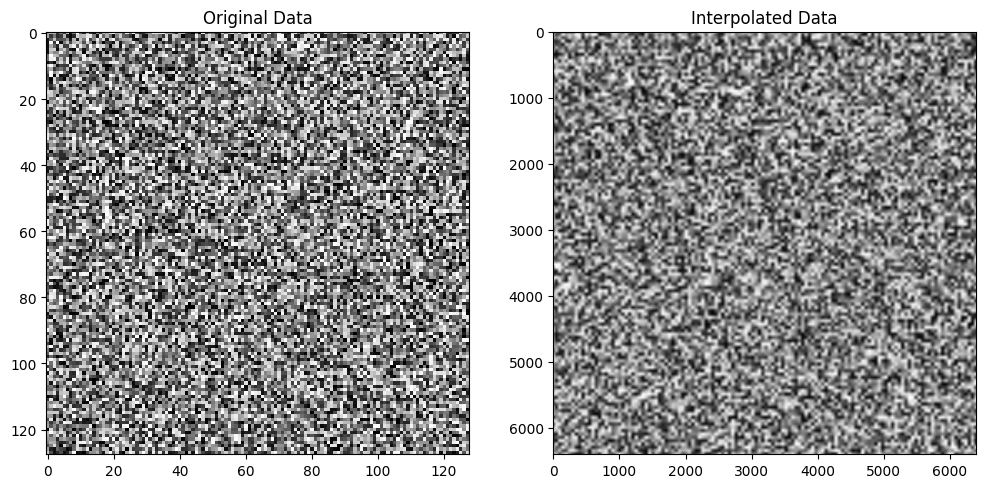

In [11]:
from scipy.interpolate import RegularGridInterpolator
import numpy as np
import matplotlib.pyplot as plt

# 使用重构后的数据
data = reconstructed_data  # 这里假设reconstructed_data是您已经有的重构数据

# 计算插值后的新尺寸，这里假设放大比例为从1KM到5M，即200倍
# 注意：由于内存限制，这里使用一个较小的示例放大比例
# 在实际应用中，您需要根据您的内存容量和数据处理能力来调整
new_size_x, new_size_y = data.shape[0] * 50, data.shape[1] * 50  # 示例中放大2倍

# 生成原始数据的坐标网格
x = np.linspace(0, 1, data.shape[0])
y = np.linspace(0, 1, data.shape[1])

# 创建插值函数，RegularGridInterpolator 需要原始坐标轴的点作为输入
interpolator = RegularGridInterpolator((x, y), data)

# 生成新的坐标网格
x_new = np.linspace(0, 1, new_size_x)
y_new = np.linspace(0, 1, new_size_y)
X_new, Y_new = np.meshgrid(x_new, y_new)

# 应用插值函数
points_new = np.array([X_new.ravel(), Y_new.ravel()]).T  # 将新网格的坐标转换为插值函数所需的形式
data_interpolated = interpolator(points_new).reshape(new_size_x, new_size_y)

# 可视化原始数据和插值后的数据
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title('Original Data')
plt.subplot(1, 2, 2)
plt.imshow(data_interpolated, cmap='gray')
plt.title('Interpolated Data')
plt.show()
